# **Aim:-** 
To implement the non-parametric Locally Weighted Regression (LWR) algorithm to fit data points.

**Objective:-**
Implement the LWR algorithm to fit a set of data points and visualize the resulting regression curve.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def local_regression(x0, X, y, tau):
    weights = np.exp(-(X - x0) ** 2 / (2 * tau**2)).ravel()
    model = LinearRegression()
    model.fit(X, y, sample_weight=weights)
    return model.predict(np.array([[x0]]).reshape(1, -1))[0]

np.random.seed(56)
X = np.sort(np.random.rand(100) * 10).reshape(-1, 1)
Y = np.cos(X).ravel() + np.random.normal(0, 0.5, 100)

tau = 1.5

Y_pred = np.array([local_regression(x0, X, Y, tau) for x0 in X.ravel()])
print(Y_pred[:10])

[1.10624272 1.00495017 0.9901606  0.95397454 0.90605558 0.889329
 0.88927198 0.86958779 0.73122901 0.56093065]


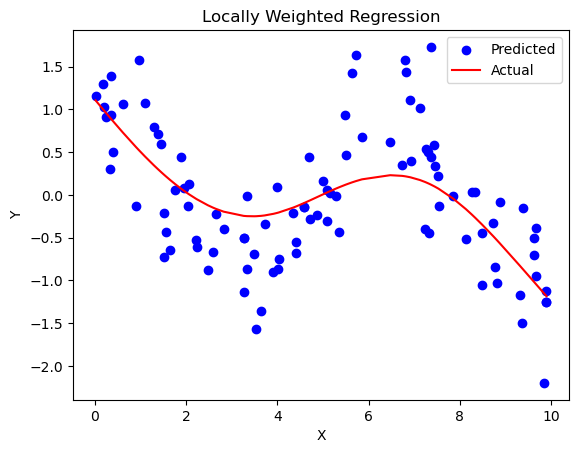

In [7]:
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally Weighted Regression')
plt.legend(['Predicted', 'Actual'])
plt.show()